In [2]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### plot 3d figure of property distributions

In [2]:
n_samplings = 400000
prop_name = ['logP', 'tPSA', 'QED']
file_path = '/fileserver-gamma/chaoting/ML/dataset/moses/raw/train/prop_temp.csv'

In [3]:
df = pd.read_csv(file_path)
# df = df.sample(n=n_samplings)
df = df[prop_name]
df.describe()

,logP,tPSA,QED
count,1.584663e+06,1.584663e+06,1.584663e+06
mean,2.439959e+00,6.581605e+01,8.065135e-01
std,9.293211e-01,1.810195e+01,9.492300e-02
min,-5.394000e+00,0.000000e+00,1.912301e-01
25%,1.877700e+00,5.351000e+01,7.583213e-01
50%,2.557580e+00,6.474000e+01,8.220802e-01
75%,3.112800e+00,7.724000e+01,8.765418e-01
max,5.553300e+00,2.065000e+02,9.484191e-01


In [4]:
def plot3d(prop_name, data, figsize=10, s=1, alpha=0.75,
           cmap='BuGn', levels=20, ax_limits=None, ngrids=20j):

    """
    plot a scattering 3D figure with distributions on
    three planes
    ----------
    prop_name: list
        a list of the three variables
    data: pandas.DataFrame
        a DataFrame recording the points
    figpath: string
        the figure path
    figsize: float, 10
        figure size
    s: float, 1
        the size of each point
    alpha: float, 0.75
        the transparency
    cmap: string, 'RdBu_r'
        the color
    levels: int, 20
        the number of the contour lines
    ax_limits: dict, None
        the limits of the axes in three directions
    ngrids: int, 20
        number of the grids each sides
    """

    assert len(prop_name) == 3

    if ax_limits == None:
        ax_limits = {
            prop_name[0]: [np.floor(data[prop_name[0]].min()),
                           np.ceil(data[prop_name[0]].max())],
            prop_name[1]: [np.floor(data[prop_name[1]].min()),
                           np.ceil(data[prop_name[1]].max())],
            prop_name[2]: [np.floor(data[prop_name[2]].min()),
                           np.ceil(data[prop_name[2]].max())]
        }

    xmin = ax_limits[prop_name[0]][0]
    xmax = ax_limits[prop_name[0]][1]
    ymin = ax_limits[prop_name[1]][0]
    ymax = ax_limits[prop_name[1]][1]
    zmin = ax_limits[prop_name[2]][0]
    zmax = ax_limits[prop_name[2]][1]

    x, y, z = np.mgrid[xmin:xmax:ngrids,
                       ymin:ymax:ngrids,
                       zmin:zmax:ngrids]


    # Convert DataFrame to Numpy array
    data = data.to_numpy().T

    # Compute kernel density
    kernel = sp.stats.gaussian_kde(data)
    positions = np.vstack((x.ravel(), y.ravel(), z.ravel()))
    density = np.reshape(kernel(positions).T, x.shape)

    d1, d2, d3 = np.unravel_index(density.argmax(), density.shape)
    highest_freq_values = [x[d1,d2,d3], y[d1,d2,d3], z[d1,d2,d3]]

    # plot data
    ax = plt.subplot(projection='3d')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(15, 15)

    # Set figure size
    # fig = plt.gcf()
    # fig.set_size_inches(figsize, figsize, figsize)

    ax.scatter(data[0, :], data[1, :], data[2, :], s=s, marker='o', c='k')

    ax.set_xlabel(prop_name[0], fontsize=32)
    ax.set_ylabel(prop_name[1], fontsize=32)
    ax.set_zlabel(prop_name[2], fontsize=32)

    ax.xaxis.labelpad = 26
    ax.yaxis.labelpad = 26
    ax.zaxis.labelpad = 26

    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.tick_params(axis='z', labelsize=24)

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    
    print('plot projection of density onto x-axis')
    plotdat = np.sum(density, axis=0)  # summing up density along z-axis
    plotdat = plotdat / np.max(plotdat)
    ploty, plotz = np.mgrid[ymin:ymax:ngrids, zmin:zmax:ngrids]
    
    colorx = ax.contourf(plotdat, ploty, plotz, levels=levels,
                        alpha=alpha, cmap=cmap, offset=xmin, zdir='x')

    print('plot projection of density onto y-axis')
    plotdat = np.sum(density, axis=1)  # summing up density along y-axis
    plotdat = plotdat / np.max(plotdat)
    plotx, plotz = np.mgrid[xmin:xmax:ngrids, zmin:zmax:ngrids]
    colory = ax.contourf(plotx, plotdat, plotz, levels=levels,
                        alpha=alpha, cmap=cmap, offset=ymax, zdir='y')

    print('plot projection of density onto z-axis')
    plotdat = np.sum(density, axis=2)
    plotdat = plotdat / np.max(plotdat)
    plotx, ploty = np.mgrid[xmin:xmax:ngrids, ymin:ymax:ngrids]
    colorz = ax.contourf(plotx, ploty, plotdat, levels=levels,
                        alpha=alpha, cmap=cmap, offset=zmin, zdir='z')

    cbar = fig.colorbar(colorx, ax=ax, shrink=0.5, pad=0.1)
    cbar.ax.tick_params(labelsize=20)

    plt.tight_layout()
    # fig.savefig(figpath)
    
    return highest_freq_values

In [5]:
highest_freq_values = plot3d(prop_name, df, figsize=20)
# [2.842105263157894, 65.36842105263159, 0.7894736842105263]
highest_freq_values

[2.842105263157894, 65.36842105263159, 0.7894736842105263]


### plot Scatter Matrix

In [13]:
file_path = "/fileserver-gamma/chaoting/ML/dataset/moses/raw/train/prop_serial.csv"
df = pd.read_csv(file_path)
df = df[['logP', 'tPSA', 'QED']]
df = df[:200000]

<ipython-input-14-c481062127a6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix = pd.plotting.scatter_matrix(
<ipython-input-14-c481062127a6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(ax.get_xticks(), rotation=0) for ax in scatter_matrix.reshape(-1)]


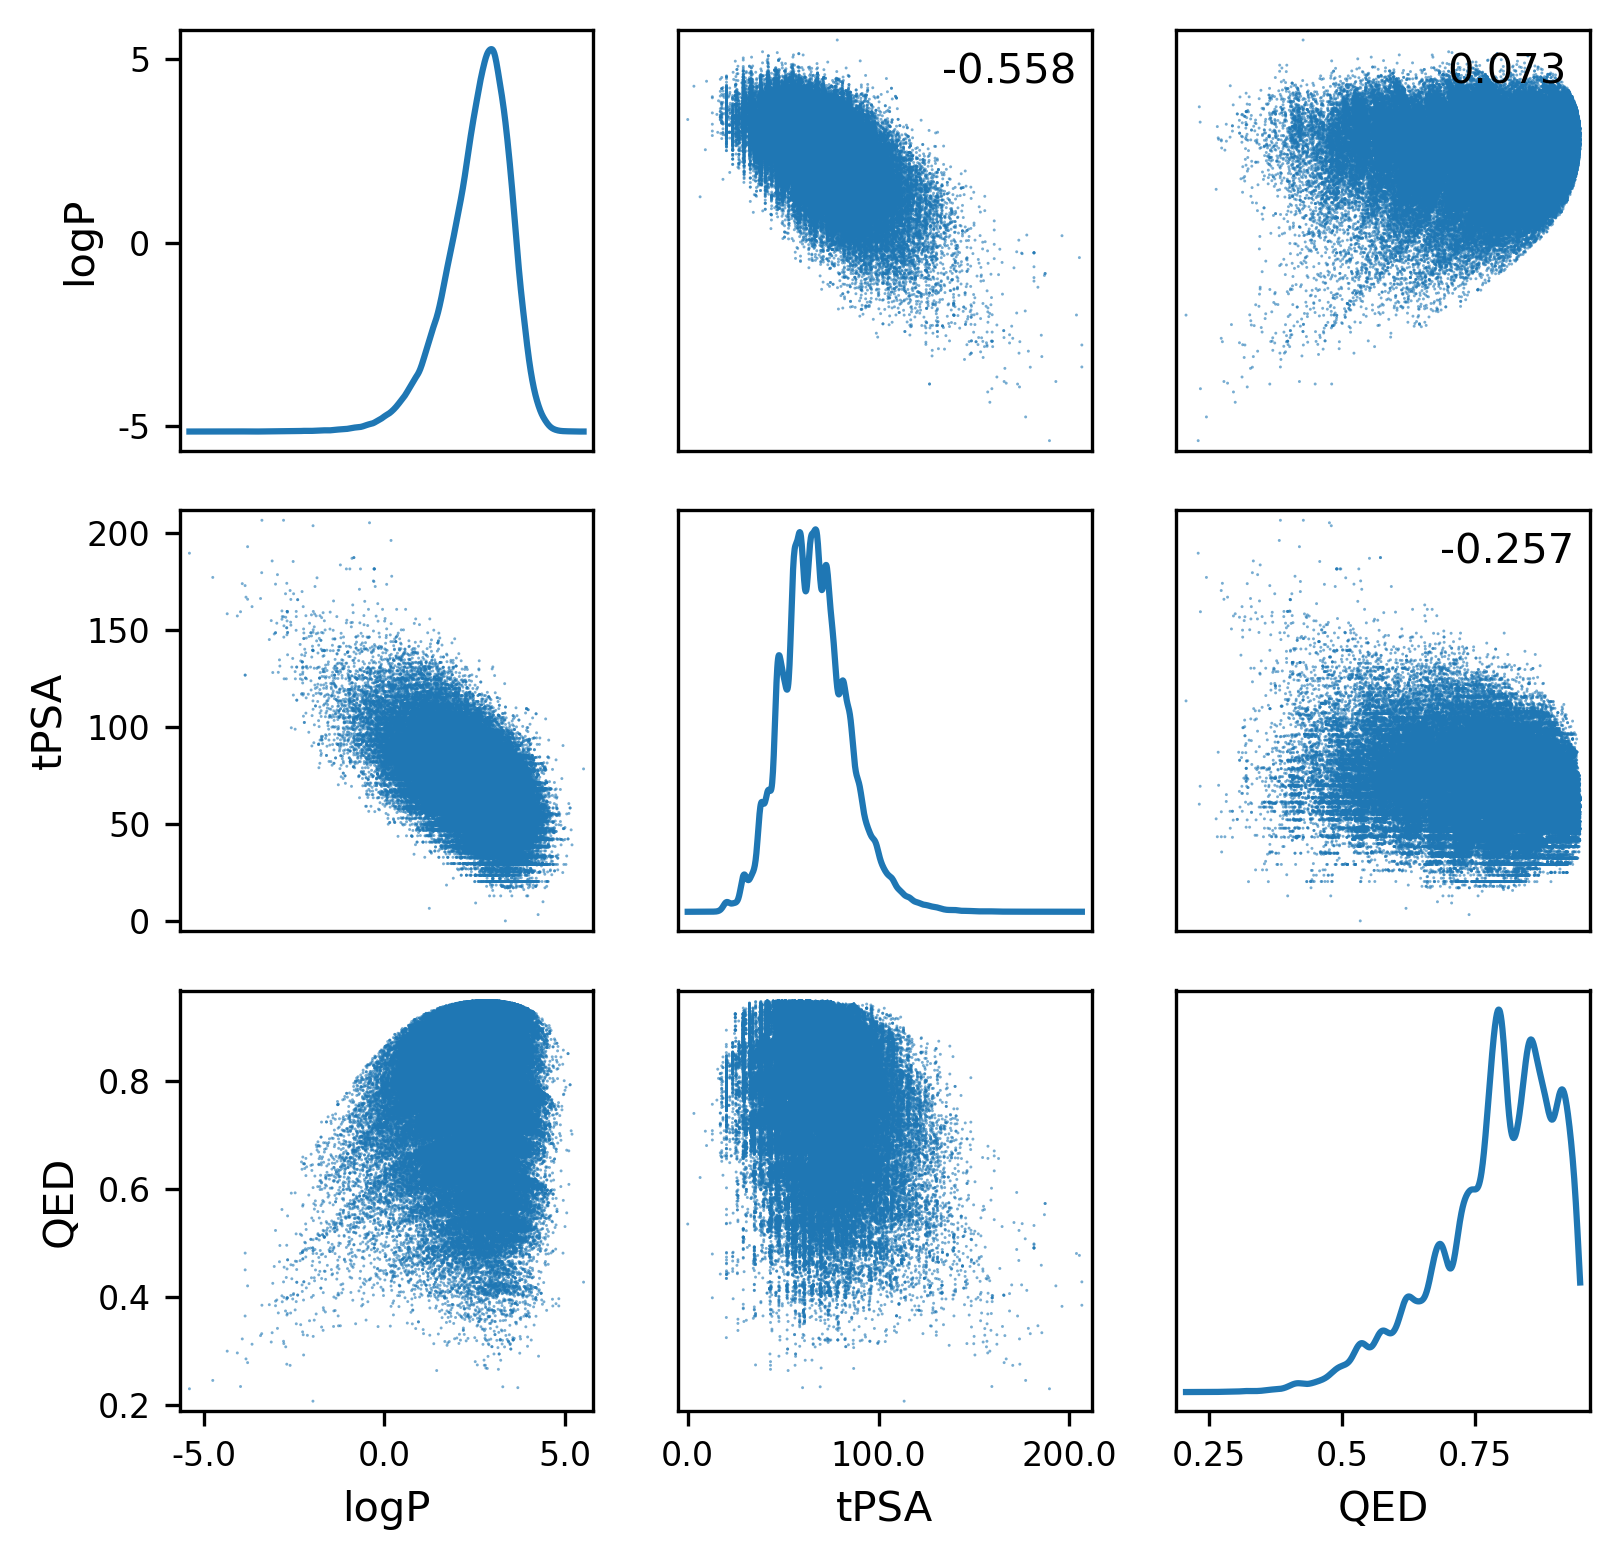

In [14]:
fig, axes = plt.subplots(figsize=(5.5, 5.3), dpi=300)
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    ax=axes,
    alpha=0.6,
    diagonal='kde',
    s=2
)
corr = df.corr().to_numpy()

[ax.set_xticklabels(ax.get_xticks(), rotation=0) for ax in scatter_matrix.reshape(-1)]

for i, j in zip(*np.triu_indices_from(scatter_matrix, k=1)):
    scatter_matrix[i, j].annotate(
        "%.3f" % corr[i, j],
        (0.8, 0.90),
        xycoords='axes fraction',
        ha='center',
        va='center'
    )

plt.tight_layout()

### plot Bemis-Murcko Scaffold

In [1]:
file_folder = '/fileserver-gamma/chaoting/ML/dataset/moses/raw/'

In [28]:
train = pd.read_csv(os.path.join(file_folder, 'train.csv'), index_col=[0])
test = pd.read_csv(os.path.join(file_folder, 'test.csv'), index_col=[0])
test_scaffolds = pd.read_csv(os.path.join(file_folder, 'test_scaffolds.csv'), index_col=[0])

In [45]:
train_sca = train[['scaffold']]
test_sca = test[['scaffold']]
test_scaffolds_sca = test_scaffolds[['scaffold']]

In [24]:
# train_sca = train_sca.drop_duplicates(subset=['scaffold'], ignore_index=True)
# test_sca = test_sca.drop_duplicates(subset=['scaffold'], ignore_index=True)
# test_scaffolds_sca = test_scaffolds_sca.drop_duplicates(subset=['scaffold'], ignore_index=True)

In [46]:
train_sca = train_sca.dropna(subset=['scaffold'])
test_sca = test_sca.dropna(subset=['scaffold'])
test_scaffolds_sca = test_scaffolds_sca.dropna(subset=['scaffold'])

In [69]:
scaffolds = train_sca.value_counts().keys().tolist()
scaffold_num = np.arange(1, len(scaffolds)+1)
scaffold_counts = train_sca.value_counts().tolist()

In [71]:
print(len([s for s in scaffold_counts if s >= 100]))
print(sum([s for s in scaffold_counts if s >= 100]))
print(len([s for s in scaffold_counts if s == 1]))

1371
580868
249878


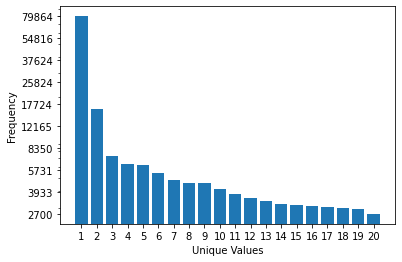

In [67]:


scaffold_num = scaffold_num[:20]
scaffold_counts = scaffold_counts[:20]

plt.bar(scaffold_num, scaffold_counts)
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.xticks(scaffold_num)

plt.yscale('log')
yticks = np.logspace(np.log10(min(scaffold_counts)), np.log10(max(scaffold_counts)), num=10)
plt.yticks(yticks, yticks.astype(int))

plt.show()

In [38]:
print(len(train_sca))
print(len(test_sca))
print(len(test_scaffolds_sca))

1584079
175984
176225


In [39]:
train_sca_set = set(train_sca['scaffold'])
test_sca_set = set(test_sca['scaffold'])
test_scaffolds_sca_set = set(test_scaffolds_sca['scaffold'])


In [44]:
print(len(train_sca_set))
print(len(test_sca_set))
print(len(test_scaffolds_sca_set))

376593
77214
44885


In [42]:
print(len(train_sca_set))
print(len(train_sca_set-test_sca_set))
print(len(test_sca_set-train_sca_set))
print(len(test_sca_set.intersection(train_sca_set)))

376593
326926
27547
49667


In [37]:
test_scaffolds_sca_set

{'c1cc(C2CCC2)nc(NCc2nnc3n2CCC3)n1',
 'O=C(NCc1ccccc1)c1ccc(OCC(=O)C2CC2)cc1',
 'O=C1NCc2cnnn2-c2ccccc21',
 'O=C(NCCC1COc2ccccc2O1)c1ccn[nH]1',
 'c1noc(-c2cc3c(s2)CCCC3)n1',
 'O=C(NCc1nnc[nH]1)Nc1ccn(-c2ccccn2)n1',
 'O=C1CCc2cc(CNC(=O)NCc3ccsc3)ccc2N1',
 'O=C(OCc1cc2ccccn2c1)c1cscn1',
 'O=C(CN1CCOC(c2nccs2)C1)NCCOc1ccccc1',
 'O=C(N1CCCCC1)C1(Sc2ccccc2)CCCC1',
 'c1coc(C2N3CC4CC(C3)CN2C4)c1',
 'O=C(Nc1cccc2[nH]ccc12)C1(n2cnnn2)CCCCC1',
 'O=C(NCc1csc(N2CCCC2)n1)c1ccc(=O)[nH]c1',
 'c1cc(Cn2ccnc2-c2ccno2)on1',
 'O=C(NCCOc1cccnc1)N1CCCCC1c1ccc[nH]1',
 'O=S(=O)(c1cccnc1)N1CCNc2ccccc21',
 'O=C(Cn1nnc(-c2ccccc2)n1)Nc1ccn[nH]1',
 'O=C(Cc1c[nH]c2ccccc12)NCc1cnoc1',
 'O=C(NCCCn1ccccc1=O)C1COc2ccccc2O1',
 'c1ccc(-n2cnnc2-c2cscn2)cc1',
 'O=C(Nc1nc2c(s1)CCc1[nH]ncc1-2)C1CCC1',
 'O=C1c2cnc(N3CCOCC3)nc2CN1CCc1ccccc1',
 'O=C(CCn1cccn1)Nc1ccc(-c2cn3cccnc3n2)cc1',
 'O=C(c1ccncc1)N1CC2OCC(=O)N(CC3CCCCC3)C2C1',
 'O=C(C1CC1)N1CCc2ccc(=O)n(Cc3cccnc3)c2CC1',
 'O=C(OCCN1CCOCC1)c1cc2ccccc2o1',
 'O=C(CCC(=O)Oc1cc

In [43]:
1584663/376593

4.2078928710836365